In [11]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Cargar los datos en un DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


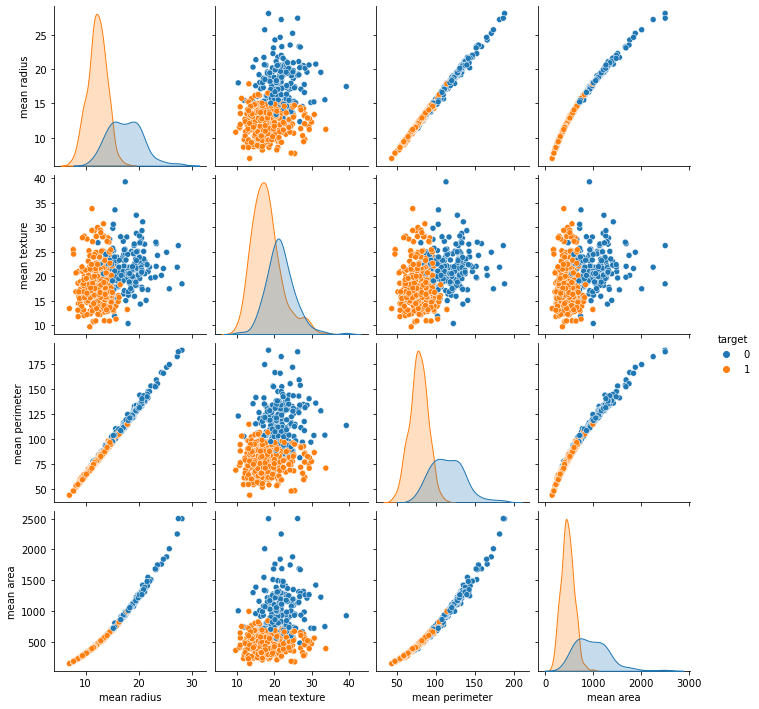

In [13]:
# Dibujar la distribución de muestras en base a las cuatro primeras variables
sns.pairplot(df.iloc[:, [0, 1, 2, 3, -1]], hue="target", height=2.5)

c:\Users\alvaro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

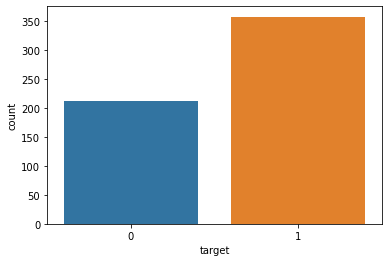

In [14]:
# Representar gráficamente la cantidad de muestras por clase
sns.countplot(df['target'])

# plt.bar(df.target_names, df['target'].value_counts().values)


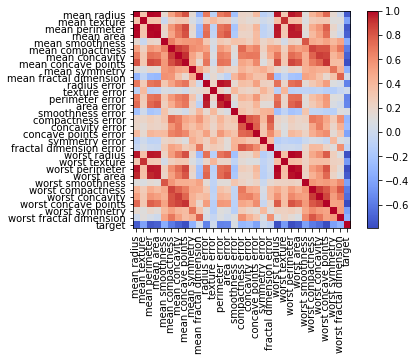

In [15]:
# Representar el mapa de correlación entre variables
corr = df.corr()
# sns.heatmap(corr, cmap='coolwarm', annot=True)

plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

<AxesSubplot:>

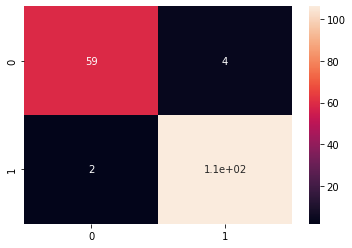

In [16]:
# Subdividir el conjunto de datos en entrenamiento y prueba
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el clasificador SVC y obtener resultados
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Calcular la matriz de confusión y mostrarla en una gráfica
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [17]:
# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, svc.predict_proba(X_test)[:, 1])
print("Exactitud: {:.3f}".format(accuracy))
print("Precisión: {:.3f}".format(precision))
print("Exhaustividad: {:.3f}".format(recall))
print("Valor-F: {:.3f}".format(f1))
print("Pérdida Logarítmica: {:.3f}".format(logloss))

Exactitud: 0.965
Precisión: 0.964
Exhaustividad: 0.981
Valor-F: 0.972
Pérdida Logarítmica: 0.087


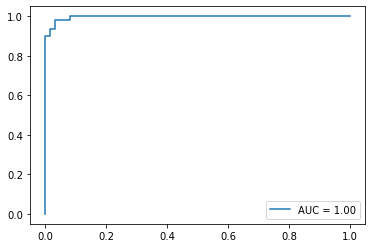

In [18]:
# Calcular la curva ROC y el área bajo la curva AUC
fpr, tpr, _ = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc))
plt.legend()

plt.show()


In [19]:
from sklearn.model_selection import  cross_val_score

In [20]:
# Realizar la validación cruzada de 5 folds
scores = cross_val_score(svc, X_train, y_train, cv=5)

# Mostrar los resultados de la validación cruzada
print('Resultados de la validación cruzada:')
print(scores)
print('Exactitud promedio: {:.3f}'.format(scores.mean()))

Resultados de la validación cruzada:
[0.9625     0.925      1.         0.96202532 0.91139241]
Exactitud promedio: 0.952


In [21]:
from sklearn.model_selection import  GridSearchCV

In [22]:
# Definir los hiperparámetros a buscar
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'sigmoid']}



# Realizar la búsqueda de hiperparámetros con validación cruzada de 5 folds
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros y la puntuación de exactitud
print('Mejores hiperparámetros:', grid_search.best_params_)
print('Exactitud:', grid_search.best_score_)

Mejores hiperparámetros: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
Exactitud: 0.9622784810126582
